https://docs.google.com/document/d/1dQBTcFjiuRYw9HikHv1OIaTYk-MAMScFtoto9U8B1Gc/edit

Second Semester Project (30 marks)
ShopSmart Inc. is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.
Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.
Data Sources:
The data for this project will be sourced from ShopSmart Inc.'s website and will include various attributes such as customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.
 
Methodology:
The project will involve data wrangling to preprocess the dataset, followed by exploratory data analysis (EDA) to uncover patterns and trends in customer behavior. Visualization techniques will be used to present the findings effectively.
Expected Outcome:
By understanding customer behavior and preferences, ShopSmart Inc. aims to optimize its website, product offerings, and marketing strategies to increase customer satisfaction, retention, and ultimately, revenue.
 
You are provided with 5 datasets from different tables, your first task is to merge the datasets, clean and wrangle the dataset, engineer new features from event data. Then identify the following:

a.     Visit Frequency:
How often does this customer visit the website, based on the provided data?
Can you identify any patterns or trends in the customer's visit frequency?

b. 	Location Analysis:
What is the customer's location based on the provided data?
How might the customer's location influence their purchasing behavior?

c.  	Overall Purchase Behavior:
Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
How might these insights inform marketing strategies or personalized recommendations for this customer?



In [3]:
#Importing neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Accessing and saving the datasets as variables 
customers_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\customers.csv')
events_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\events.csv')
orders_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\orders.csv')
line_items_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\line_items.csv')
products_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\products.csv')

In [22]:
# Printing out the columns to access
print("Columns in customers_df:", customers_df.columns)
print("Columns in events_df:", events_df.columns)
print("Columns in orders_df:", orders_df.columns)
print("Columns in line_items_df:", line_items_df.columns)
print("Columns in products_df:", products_df.columns)

Columns in customers_df: Index(['customer_id', 'device_id', 'location', 'currency'], dtype='object')
Columns in events_df: Index(['event_id', 'customer_id', 'event_data', 'event_timestamp'], dtype='object')
Columns in orders_df: Index(['order_id', 'customer_id', 'status', 'checked_out_at'], dtype='object')
Columns in line_items_df: Index(['line_item_id', 'order_id', 'item_id', 'quantity'], dtype='object')
Columns in products_df: Index(['id', 'name', 'price'], dtype='object')


In [23]:
line_items_df.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [24]:
products_df.head()

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


In [25]:
products_df.rename(columns={'id': 'item_id'}, inplace=True)

In [26]:
products_df.head()

,item_id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


### MERGING THE DATASETS

In [28]:
# Merge customer_df and events_df on 'customer_id'
merged_data1 = pd.merge(customers_df, events_df, on='customer_id', how='inner')

# Merge merged_data1 and orders_df on 'customer_id'
merged_data2 = pd.merge(merged_data1, orders_df, on='customer_id', how='inner')

# Merge merged_data2 and line_items_df on 'order_id'
merged_data3 = pd.merge(merged_data2, line_items_df, on='order_id', how='inner')

# Merge merged_data3 and products_df on 'item_id'
merged_data4 = pd.merge(merged_data3, products_df, on='item_id', how='inner')


### The inner merge was used


#### Inner merge combines the rows from two datasets based on a common key and includes only the rows that have matching values in both datasets. meaning, for each pair of rows (one from each dataset) with the same key value, the resulting merged dataset will contain a single row combining the columns from both datasets.
The rows from either dataset that do not have a corresponding match in the other dataset are excluded from the merged result.
The resulting dataset will contain only rows where the key value exists in both datasets being merged.

This will evidently eliminate any missing value is sign when when isna().sum() function is ran.

Also it would also reduce the total rows of the combined datasets because it doesn't fill with NaN.



#### Outer merge, combines the rows from two datasets using a common key and includes all rows from both datasets, even if there are no matching values in the other dataset.

### The Inner merge is more straight forward and quicker to clean, wranggle and analyze, though a minute amount of negligible data is ignored


In [32]:
merged_data4.shape

(578320, 15)

In [34]:
merged_data4.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [36]:
merged_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 70.6+ MB


In [37]:
merged_data4.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [42]:
# Choosing path to save the dataset to
file_path = r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\shopsmart_df.csv'

In [43]:
#Saving the dataset
# merged_data4.to_csv(file_path, index=False)

In [1]:
#Importing neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the the datasets using pandas
shopsmart_df = pd.read_csv(r'C:\Users\KLAUS\Desktop\JUPYTER\altschool-sod-second-semester-project\datasets\shopsmart_df.csv')

In [3]:
shopsmart_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [4]:
shopsmart_df.shape

(578320, 15)

In [5]:
# Investigating for missing or NaN data

In [6]:
shopsmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


In [7]:
shopsmart_df.isna().sum()

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64

In [8]:
# Checking datasets for duplicates
shopsmart_df.duplicated().sum()

0

In [9]:
# Checking datasets for duplicates
shopsmart_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [10]:
# WIth no missing values,NaN or Duplicate value I can say the data is cleaned

In [11]:
# DATA WRANGLING PROCESS

In [12]:
shopsmart_df.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'line_item_id', 'item_id', 'quantity', 'name', 'price'],
      dtype='object')

In [13]:
# Dropping Unnecessary and Redundant columns
redundant_columns = ['device_id', 'line_item_id', 'event_timestamp']

# Drop irrelevant columns from the merged dataset
shopsmart_clean = shopsmart_df.drop(columns=redundant_columns)

In [14]:
shopsmart_clean.rename(columns={'name': 'product_name'}, inplace=True)

In [15]:
shopsmart_clean.head(3)

,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99


### Feature Engineering for the event_data

In [16]:
# Carrying out feature engineering for the event data.

'''

Since the event_data is in json format, 
we have Parse the event_data column in the shopsmart_clean DataFrame to 
extract timestamp and event_type into separate columns using pandas and the json library.

'''

import json

# Assuming `shopsmart_clean` is your cleaned DataFrame

# Parse `event_data` column to extract `timestamp` and `event_type`
shopsmart_clean['timestamp'] = shopsmart_clean['event_data'].apply(lambda x: json.loads(x)['timestamp'])
shopsmart_clean['event_type'] = shopsmart_clean['event_data'].apply(lambda x: json.loads(x)['event_type'])

# Convert `timestamp` to datetime format
shopsmart_clean['timestamp'] = pd.to_datetime(shopsmart_clean['timestamp'])

# Extract date features
shopsmart_clean['day'] = shopsmart_clean['timestamp'].dt.strftime('%A')
shopsmart_clean['month'] = shopsmart_clean['timestamp'].dt.strftime('%B')


# Map timestamp to time of day categories
def get_time_of_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply time of day mapping to `timestamp` and create new column `time_of_day`
shopsmart_clean['time_of_day'] = shopsmart_clean['timestamp'].dt.hour.apply(get_time_of_day)


# Displaying the updated DataFrame with new features
shopsmart_clean.head()

,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price,timestamp,event_type,day,month,time_of_day
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406559,visit,Saturday,March,Morning
3,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406561,visit,Saturday,March,Morning
4,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406769,add_to_cart,Saturday,March,Morning


In [17]:
# Engineering the checked_out_at column to get the time, day and month of checkout

shopsmart_clean['checked_out_at'] = pd.to_datetime(shopsmart_clean['checked_out_at'])

#Extracting checkout time features
shopsmart_clean['checked_out_day'] = shopsmart_clean['checked_out_at'].dt.strftime('%A')
shopsmart_clean['checked_out_month'] = shopsmart_clean['checked_out_at'].dt.strftime('%B')

# Getting time of day of checkout
shopsmart_clean['time_of_checkout'] = shopsmart_clean['checked_out_at'].dt.hour.apply(get_time_of_day)

In [18]:
shopsmart_clean.head(2)

,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price,timestamp,event_type,day,month,time_of_day,checked_out_day,checked_out_month,time_of_checkout
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening,Saturday,March,Morning
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning,Saturday,March,Morning


In [19]:


# Extracting first 8 characters of `customer_id` and `order_id`
shopsmart_clean['customer_id'] = shopsmart_clean['customer_id'].apply(lambda x: x[:8])
shopsmart_clean['order_id'] = shopsmart_clean['order_id'].apply(lambda x: x[:8])

# Display the updated DataFrame with truncated IDs
shopsmart_clean.head(2)


,customer_id,location,currency,event_id,event_data,order_id,status,checked_out_at,item_id,quantity,product_name,price,timestamp,event_type,day,month,time_of_day,checked_out_day,checked_out_month,time_of_checkout
0,cda7bec0,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening,Saturday,March,Morning
1,cda7bec0,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",9e950ce3,success,2024-03-30 04:19:10.406794,4,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning,Saturday,March,Morning


In [20]:
# Dropping furthur columns

'''
   Dropping columns that will no longer be neccesarry for my analysis
'''

redundant_columns_2 = ['event_data', 'checked_out_at', 'item_id']

shopsmart = shopsmart_clean.drop(columns=redundant_columns_2)
shopsmart.head(3)

,customer_id,location,currency,event_id,order_id,status,quantity,product_name,price,timestamp,event_type,day,month,time_of_day,checked_out_day,checked_out_month,time_of_checkout
0,cda7bec0,Saint Helena,NGN,14786,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-26 22:05:58.863661,visit,Tuesday,March,Evening,Saturday,March,Morning
1,cda7bec0,Saint Helena,NGN,14787,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-27 07:14:33.987347,visit,Wednesday,March,Morning,Saturday,March,Morning
2,cda7bec0,Saint Helena,NGN,14788,9e950ce3,success,2,Microsoft Xbox Series X,499.99,2024-03-30 04:03:10.406559,visit,Saturday,March,Morning,Saturday,March,Morning


In [21]:
shopsmart.columns

Index(['customer_id', 'location', 'currency', 'event_id', 'order_id', 'status',
       'quantity', 'product_name', 'price', 'timestamp', 'event_type', 'day',
       'month', 'time_of_day', 'checked_out_day', 'checked_out_month',
       'time_of_checkout'],
      dtype='object')

In [22]:


# Reordering the dataframe to enable easy understanding

new_column_order = ['customer_id', 'location', 'currency', 'event_id', 'time_of_day', 'day', 
                    'month', 'product_name', 'price', 'quantity', 'timestamp', 'event_type', 'status', 'time_of_checkout',
                    'checked_out_day', 'checked_out_month']


shopsmart = shopsmart[new_column_order]

# Display the updated DataFrame with reordered columns
shopsmart.head()


,customer_id,location,currency,event_id,time_of_day,day,month,product_name,price,quantity,timestamp,event_type,status,time_of_checkout,checked_out_day,checked_out_month
0,cda7bec0,Saint Helena,NGN,14786,Evening,Tuesday,March,Microsoft Xbox Series X,499.99,2,2024-03-26 22:05:58.863661,visit,success,Morning,Saturday,March
1,cda7bec0,Saint Helena,NGN,14787,Morning,Wednesday,March,Microsoft Xbox Series X,499.99,2,2024-03-27 07:14:33.987347,visit,success,Morning,Saturday,March
2,cda7bec0,Saint Helena,NGN,14788,Morning,Saturday,March,Microsoft Xbox Series X,499.99,2,2024-03-30 04:03:10.406559,visit,success,Morning,Saturday,March
3,cda7bec0,Saint Helena,NGN,14789,Morning,Saturday,March,Microsoft Xbox Series X,499.99,2,2024-03-30 04:03:10.406561,visit,success,Morning,Saturday,March
4,cda7bec0,Saint Helena,NGN,14790,Morning,Saturday,March,Microsoft Xbox Series X,499.99,2,2024-03-30 04:03:10.406769,add_to_cart,success,Morning,Saturday,March


### Visit Frequency

##### How often does this customer visit the website, based on the provided data?
##### Can you identify any patterns or trends in the customer's visit frequency?


In [23]:
# Calculate visit frequency (number of visits) per customer
visit_frequency = shopsmart['customer_id'].value_counts()

# Display visit frequency statistics and trends
print("Visit Frequency Statistics:")
print(visit_frequency.describe())

# Identify patterns or trends in visit frequency
# Example: Plotting visit frequency distribution or trends over time
# Customize as per your analysis needs

Visit Frequency Statistics:
count    4594.000000
mean      125.885938
std        89.186046
min         3.000000
25%        45.000000
50%       112.000000
75%       198.000000
max       372.000000
Name: customer_id, dtype: float64


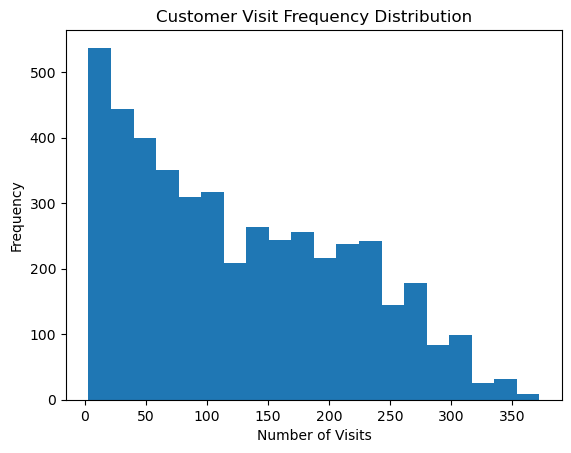

In [24]:
import matplotlib.pyplot as plt

plt.hist(visit_frequency, bins=20)
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.title('Customer Visit Frequency Distribution')
plt.show()

In [25]:
visit_frequency.describe()

count    4594.000000
mean      125.885938
std        89.186046
min         3.000000
25%        45.000000
50%       112.000000
75%       198.000000
max       372.000000
Name: customer_id, dtype: float64


####  From the .describe(), it can be seen that the total number of unique customer_d is 4594

#### The Average visit per customer_id is 125

#### The highest visit per individual is 372 and the minimum visit is 3

In [26]:
shopsmart.customer_id.nunique()

4594

In [27]:

def analyze_customer_visits(df, customer_id):
    """
    Analyze customer visit frequency and trends based on time of day, day of week, and month.
    
    Parameters:
        df (DataFrame): Input DataFrame containing customer visit data.
        customer_id (str): Customer ID for which to analyze visit patterns.
    """
    # Filter data for the specified customer_id
    customer_data = df[df['customer_id'] == customer_id]
    
    if customer_data.empty:
        print(f"No data found for customer ID: {customer_id}")
        return
    
    # Calculate visit frequency over time
    visit_counts = customer_data['timestamp'].dt.date.value_counts().sort_index()
    
    # Calculate trends based on time of day, day of week, and month
    time_of_day_trends = customer_data['time_of_day'].value_counts(normalize=True)
    day_of_week_trends = customer_data['day_of_week'].value_counts(normalize=True)
    month_trends = customer_data['month'].value_counts(normalize=True)
    
    # Plotting visit frequency over time
    plt.figure(figsize=(12, 6))
    plt.plot(visit_counts.index, visit_counts.values, marker='o', linestyle='-')
    plt.title(f"Customer Visit Frequency Over Time (Customer ID: {customer_id})")
    plt.xlabel("Date")
    plt.ylabel("Number of Visits")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
    # Display trends based on time of day, day of week, and month
    print("\nTrends in Visit Patterns:")
    print("Time of Day:")
    print(time_of_day_trends)
    print("\nDay of Week:")
    print(day_of_week_trends)
    print("\nMonth:")
    print(month_trends)

# Example Usage:
# Assuming `shopsmart_data` is your DataFrame containing customer visit data
# Call the function with a specific customer_id to analyze visit patterns
analyze_customer_visits(shopsmart, 'cda7bec0')


KeyError: 'day_of_week'

In [55]:
shopsmart.columns

Index(['customer_id', 'location', 'currency', 'event_id', 'time_of_day', 'day',
       'month', 'product_name', 'price', 'quantity', 'event_type', 'status',
       'time_of_checkout', 'checked_out_day', 'checked_out_month'],
      dtype='object')

### Location Analysis

##### What is the customer's location based on the provided data?

##### How might the customer's location influence their purchasing behavior?

In [29]:
# Analyze customer location and its influence on purchasing behavior
location_counts = shopsmart['location'].value_counts()

# Display location distribution and insights
print("Location Analysis:")
print(location_counts)

# Further analysis: Compare location-based purchasing behavior (e.g., average purchase amount by location)
# Customize as per your analysis needs
location_purchases = shopsmart.groupby('location')['price'].mean()
print("Average Purchase Amount by Location:")
print(location_purchases)


Location Analysis:
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Name: location, Length: 243, dtype: int64
Average Purchase Amount by Location:
location
Afghanistan          801.946296
Albania              703.163980
Algeria              652.015380
American Samoa       694.881974
Andorra              758.598544
                        ...    
Wallis and Futuna    693.090074
Western Sahara       752.239679
Yemen                726.829292
Zambia               754.477146
Zimbabwe             648.718087
Name: price, Length: 243, dtype: float64


### Overall Purchase Behavior

##### Based on the data provided, what insights can you draw about this customer's overall behavior on the website?
##### How might these insights inform marketing strategies or personalized recommendations for this customer?


In [30]:
# Analyze overall purchase behavior
# Example: Calculate total number of purchases, average purchase amount, etc.
total_purchases = len(shopsmart)
average_purchase_amount = shopsmart['price'].mean()

print("Overall Purchase Behavior:")
print(f"Total Number of Purchases: {total_purchases}")
print(f"Average Purchase Amount: ${average_purchase_amount:.2f}")

# Additional analysis: Identify popular products, frequent order status, etc.
popular_products = shopsmart['product_name'].value_counts().head(5)
print("Popular Products:")
print(popular_products)


Overall Purchase Behavior:
Total Number of Purchases: 578320
Average Purchase Amount: $707.45
Popular Products:
Canon EOS R5 Camera           39715
Fitbit Charge 4               39268
Sony WH-1000XM4 Headphones    39162
Dell XPS 13 Laptop            39084
Samsung Galaxy S21            38997
Name: product_name, dtype: int64


In [31]:
# Provide marketing insights and recommendations based on the analysis
# Example: Tailor marketing campaigns or product recommendations based on location or purchase behavior
# Customize recommendations based on specific insights from the analysis
print("Marketing Insights and Recommendations:")
# Add your personalized recommendations here based on the analysis


Marketing Insights and Recommendations:
